# Workshop5. Линейная регрессия. (33 балла)

> Линейная регрессия - это не повод для затяжной депрессии.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [Первый конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture02-linregr.pdf)
- [Второй конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture03-linregr.pdf)
- [Теория из курса ODS](https://github.com/Yorko/mlcourse_open/blob/master/jupyter_notebooks/topic04_linear_models/topic4_linear_models_part1_mse_likelihood_bias_variance.ipynb)
- [Материалы из курса от МФТИ](https://www.coursera.org/specializations/machine-learning-data-analysis)
- [Статья про лин.рег. от ODS на habrahabr](https://habrahabr.ru/company/ods/blog/323890/)

## Данные

Возьмем датасет о стоимости домов: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```

Целевой переменной будет `SalePrice`. То есть мы будем предсказывать стоимость жилья на основе его характеристик. Это задание будет не то чтобы про линейную регрессию, но про попытку построить модель для предсказания цен на дом. В принципе я бы мог еще добавить заданий на более тщательный отбор признаков, логарифмирование признаков, у которых сильное смещение "скоса"(skew). Можно было бы анализировать и выпрямлять распределение целевой переменной. Можно было бы генерировать новые признаки из существующих, строить ансамбли моделей. Но мы ограничимся, пока что.......

In [295]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [296]:
df = pd.read_csv('/home/rimsky/Projects/ml-solutions/ml_course/data/data_house_prices.csv.gz', index_col='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [297]:
assert df.shape == (1460, 80)

In [298]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## 1.0 Анализ целевого признака (3 балла)

Удостоверимся, что раcпределение целевого признака "хорошее", без странных выбросов. В идеале мы хотим видеть нормальное распределени или достаточно похожее на него, без очень длинных "хвостов" выбросов.

_Почему требуется нормальность распределения: ищите объяснения линейной регресси через алгоритмы максимизации правдоподобия. В итоге, грубо говоря, суть сводится к тому, что с ростом объема выборки, оценка максимального правдоподобия лучше описывает нормальное распределение._

[Коэффициент эксцесса](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0) показывает степень остроты пика распределения случайной величины. Для нормального распределения он равен `0`. Если хвосты распределения «тяжелее», а пик более «приплюснутый», чем у нормального распределения, то коэффициент < 0. А если хвосты легкие, то больше 0. В нашем случае должно получиться околов `6.5`.

Задание: 
- Нарисуйте график распределения `SalePrice`, используйте аргумент `fit=scipy.stats.norm`, чтобы нарисовать предполагаемое нормальное распределение. Напечатайте значение коэффициент эксцесса `kurtosis` для этого признака.
- Нарисуйте график [scipy.stats.probplot](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html) - он покажет нам реальные квантили выборки и теоретические. По нему можно видеть, на сколько много выьросов и на сколько выборка предсказуема.
- Что вы можете сказать по поводу выборки основываясь на `probplot`.  [wiki](https://en.wikipedia.org/wiki/Normal_probability_plot)

/home/rimsky/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


6.509812011089439


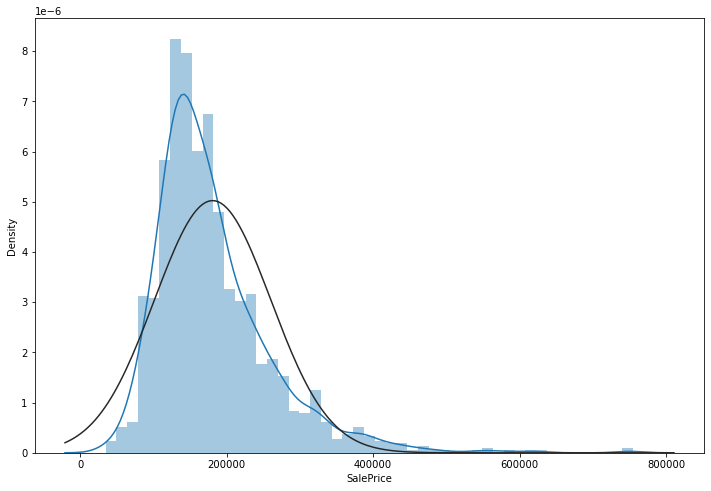

In [299]:
from scipy.stats import norm, kurtosis, probplot

plt.figure(figsize=(12, 8))
sns.distplot(df['SalePrice'], fit=norm)
print(kurtosis(df['SalePrice']))

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

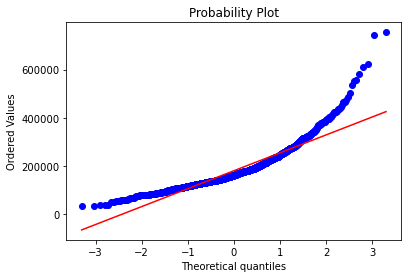

In [300]:
probplot(df['SalePrice'], plot=plt)

**Из графиков выше видно, что основная ценовая категория приходится на дома стоимостью ~80-220K, значения ниже этого диапазона крайне мало и виднеется явный выброс, чья цена очень мала (Возможно разрушенный/обвешалый дом). Также выбросами будут являться очень дорогие дома, чья цена переваливает за полмиллиона, возможно это владения американских депутатов и чиновников) На графике видно этот длинный "хвост" в сторону дорогих домов.**

## 1.2 Анализ некоторых зависимостей (3 балла)

У нас очень много разных признаков. Любопытно построить разные графики. Позаботьтесь о красоте и наглядности графиков, сделайте так, чтобы они были большими и их можно было прочесть. Даже подписи на графиках должны быть читаемые!!

Задания: Постройте графики, отражающие зависимости этих признаков:
- дата постройки дома и его стоимости
- "качество дома и материалов" и его стоимости
- площадь дома и стоимость

Hints: Вспомните про boxplot, jointplot, lmplot...

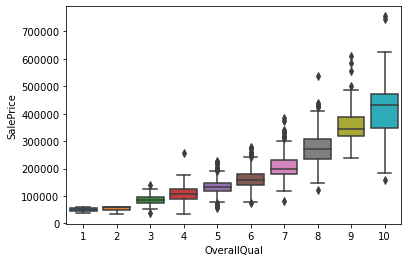

In [301]:
sns.boxplot(x='OverallQual', y='SalePrice', data=df)

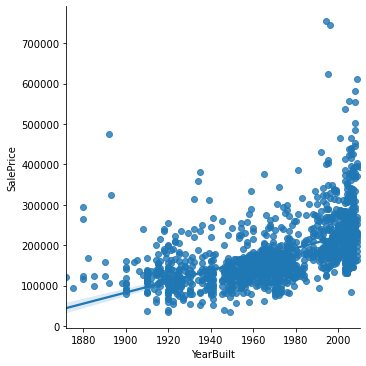

In [302]:
sns.lmplot(x='YearBuilt', y='SalePrice', data=df)

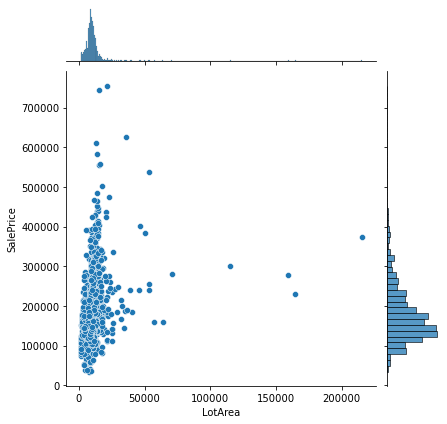

In [303]:
sns.jointplot(x='LotArea', y='SalePrice', data=df)

## 1.2 Heatmap (3 балла)

Судя по предыдущим графикам, есть некоторые линейные зависимости. Но строить по графику на каждый признак из 80 штук немного долго и не наглядно. Постройте красивый график корреляции всех признаков. Используйте цвета `RdYlGn`, так будет нагляднее. Не забудьте применить маску, чтобы убрать дублирующую половину матрицы.

In [304]:
corr = np.abs(df.corr())
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [305]:
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,0.386347,0.139781,0.032628,0.059316,0.027850,0.040581,0.022936,0.069836,0.065649,...,0.012579,0.006100,0.012037,0.043825,0.026030,0.008283,0.007683,0.013585,0.021407,0.084284
LotFrontage,0.386347,1.000000,0.426095,0.251646,0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,0.139781,0.426095,1.000000,0.105806,0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,0.091932,0.572323,0.550684,0.411876,0.239666,0.059119,...,0.238923,0.308819,0.113937,0.030371,0.064886,0.065166,0.031406,0.070815,0.027347,0.790982
OverallCond,0.059316,0.059213,0.005636,0.091932,1.000000,0.375983,0.073741,0.128101,0.046231,0.040229,...,0.003334,0.032589,0.070356,0.025504,0.054811,0.001985,0.068777,0.003511,0.043950,0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,0.375983,1.000000,0.592855,0.315707,0.249503,0.049107,...,0.224880,0.188686,0.387268,0.031355,0.050364,0.004950,0.034383,0.012398,0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,0.067759,...,0.205726,0.226298,0.193919,0.045286,0.038740,0.005829,0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,0.128101,0.315707,0.179618,1.000000,0.264736,0.072319,...,0.159718,0.125703,0.110204,0.018796,0.061466,0.011723,0.029815,0.005965,0.008201,0.477493
BsmtFinSF1,0.069836,0.233633,0.214103,0.239666,0.046231,0.249503,0.128451,0.264736,1.000000,0.050117,...,0.204306,0.111761,0.102303,0.026451,0.062021,0.140491,0.003571,0.015727,0.014359,0.386420
BsmtFinSF2,0.065649,0.049900,0.111170,0.059119,0.040229,0.049107,0.067759,0.072319,0.050117,1.000000,...,0.067898,0.003093,0.036543,0.029993,0.088871,0.041709,0.004940,0.015211,0.031706,0.011378


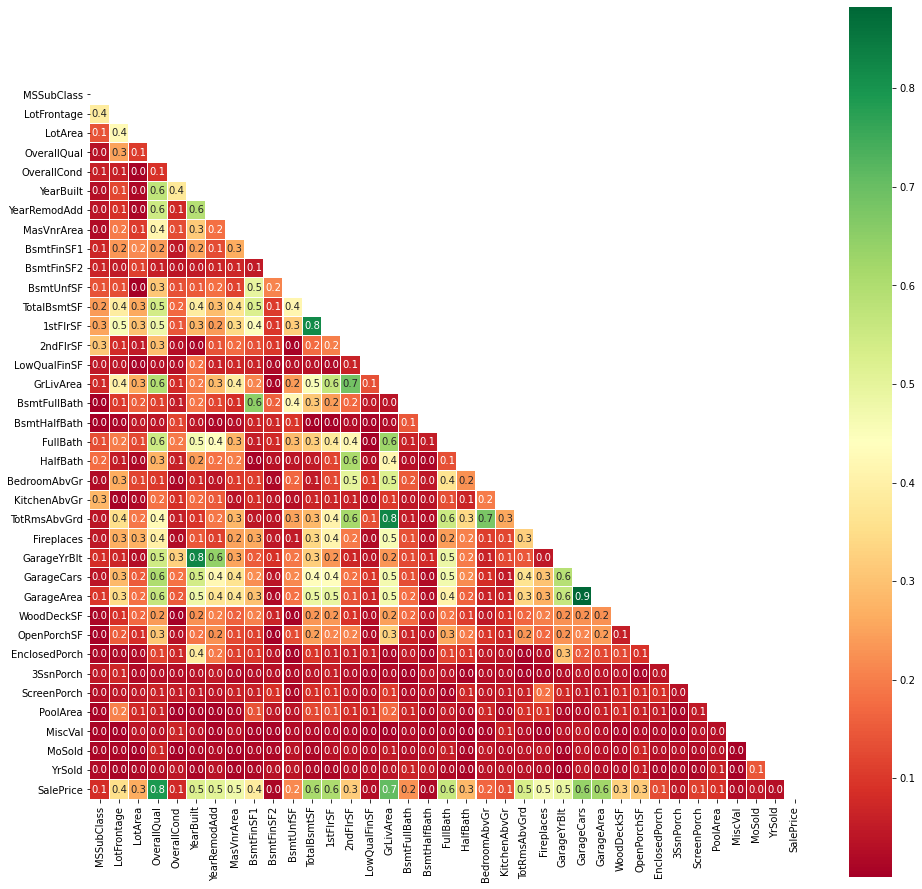

In [306]:
f, ax = plt.subplots(figsize=(16, 16))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap='RdYlGn', square=True,linewidths=.1, mask=mask,annot=True, fmt=".1f")

Большая матрица 38x38 ячеек. И мы видим, там есть сильно коррелируемые объекты с нашей целевой переменной. 

- Нарисуйте крупно heatmap этих сильно коррелируемых объектов( больше 0.5 по абсолютному значению) и сделайте так, чтобы в каждой ячейке было значение корреляции. 
- Выведите список этих сильно коррелируемых признаков.
- Желательно сделать heatmap диагональной матрицей, чтобы было красиво (в теории был пример)

Запомним эти признаки!

In [307]:
corr_y = corr[corr['SalePrice'] > 0.5]
index_ = corr_y.index
columns_ = corr_y.drop(columns=index_)
corr_y = corr_y.drop(columns=columns_)
print(corr_y.shape)
corr_y

(11, 11)


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.572323,0.550684,0.537808,0.476224,0.593007,0.550600,0.427452,0.600671,0.562022,0.790982
YearBuilt,0.572323,1.000000,0.592855,0.391452,0.281986,0.199010,0.468271,0.095589,0.537850,0.478954,0.522897
YearRemodAdd,0.550684,0.592855,1.000000,0.291066,0.240379,0.287389,0.439046,0.191740,0.420622,0.371600,0.507101
TotalBsmtSF,0.537808,0.391452,0.291066,1.000000,0.819530,0.454868,0.323722,0.285573,0.434585,0.486665,0.613581
1stFlrSF,0.476224,0.281986,0.240379,0.819530,1.000000,0.566024,0.380637,0.409516,0.439317,0.489782,0.605852
GrLivArea,0.593007,0.199010,0.287389,0.454868,0.566024,1.000000,0.630012,0.825489,0.467247,0.468997,0.708624
FullBath,0.550600,0.468271,0.439046,0.323722,0.380637,0.630012,1.000000,0.554784,0.469672,0.405656,0.560664
TotRmsAbvGrd,0.427452,0.095589,0.191740,0.285573,0.409516,0.825489,0.554784,1.000000,0.362289,0.337822,0.533723
GarageCars,0.600671,0.537850,0.420622,0.434585,0.439317,0.467247,0.469672,0.362289,1.000000,0.882475,0.640409
GarageArea,0.562022,0.478954,0.371600,0.486665,0.489782,0.468997,0.405656,0.337822,0.882475,1.000000,0.623431


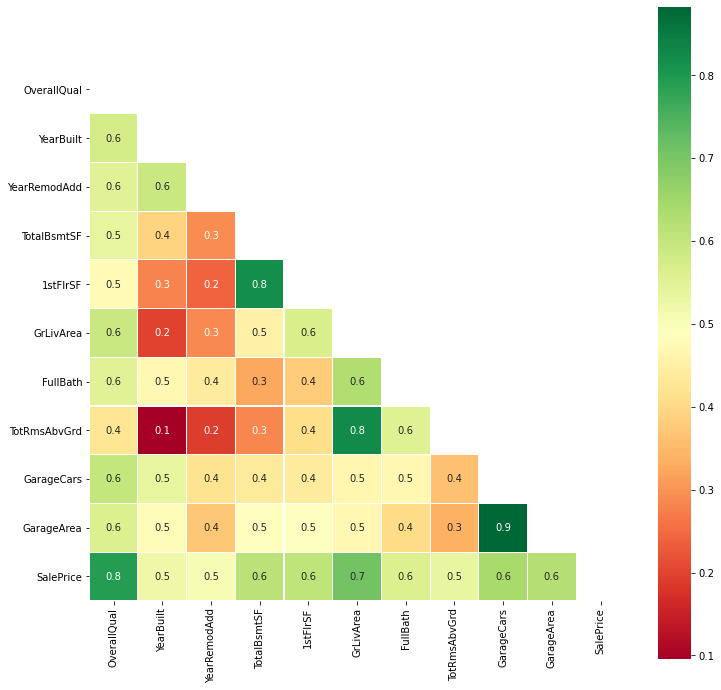

In [308]:
mask = np.zeros_like(corr_y, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr_y,cmap='RdYlGn', square=True, linewidths=.1,  mask=mask, annot=True, fmt=".1f")

## 1.3 Пропущеные данные (3 балла)

Задание:
 - Посчитайте общее количество пропущенных данных по каждому признаку
 - посчитайте долю пропущенных данных выборки
 - удалите из выборки признаки, доля пропущенных которых больще 10%
 - пропущенные категориальные заполните словом 'unknown' (у них dtype object)
 - пропущенные числовые заполните средним (у них dtype float)

Hinst: https://stackoverflow.com/a/38134049/3205200

In [309]:
len(df)

1460

In [310]:
size = len(df)
for col in df.columns:
    if (df[col].isnull().sum() / size) > 0.1:
        df.drop(columns=col, inplace=True)
df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500


In [311]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(col)
        print(df[col].dtype)
        print(df[col].isnull().sum())
        

MasVnrType
object
8
MasVnrArea
float64
8
BsmtQual
object
37
BsmtCond
object
37
BsmtExposure
object
38
BsmtFinType1
object
37
BsmtFinType2
object
38
Electrical
object
1
GarageType
object
81
GarageYrBlt
float64
81
GarageFinish
object
81
GarageQual
object
81
GarageCond
object
81


In [312]:
df.dtypes

MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
LotShape         object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 74, dtype: object

In [313]:
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).fillna(value='unknown')

In [314]:
df[df.select_dtypes(['float']).columns] = df.select_dtypes(['float']).fillna(value=df.mean())

## 1.4 Категориальные переменные (1 балл)

На сколько вы помните, линейная регрессия не умеет обрабатывать категориальные признаки, так как ей нужны ЧИСЛА. Но не беда, в pandas есть встроенная функция [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Задание:
- сконвертируйте все категориальные признаки(dtype=object) в вектора числовых с помощью get_dummies
- напечатайте сколько у вас теперь признаков
- Положите в переменную X все данные из датасета, кроме целевой переменной. Положите в переменную y только целевую переменную.

In [315]:
df = pd.get_dummies(df)
print(df.shape)
df

(1460, 281)


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
2,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
3,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
4,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
5,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,7917,6,5,1999,2000,0.0,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1457,20,13175,6,6,1978,1988,119.0,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1458,70,9042,7,9,1941,2006,0.0,275,0,877,...,0,0,0,1,0,0,0,0,1,0


In [316]:
X = df.drop(columns='SalePrice')
y = df['SalePrice']

In [317]:
X

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
2,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
3,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
4,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
5,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,7917,6,5,1999,2000,0.0,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1457,20,13175,6,6,1978,1988,119.0,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1458,70,9042,7,9,1941,2006,0.0,275,0,877,...,0,0,0,1,0,0,0,0,1,0


In [318]:
y

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

## 1.5 Переобучение (3 балла)

Обучим обычную модель без регуляризации [sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

- Выведите все коэффициенты для каждого признака, отсортировав по возрастанию по модулю значения коэффициента. Используйте print и for, иначе jupyter схлопнет вывод numpy массива. Можете округлить коэффициенты до 2 знаков после запятой.
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)

In [319]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X, y)
print(linreg.coef_.shape)
for coef, col in sorted(zip(linreg.coef_, df.columns), key=lambda x: np.abs(x[0])):
    print("{} \t {}".format(np.round(coef, 2), col))

(280,)
0.11 	 MiscVal
0.77 	 LotArea
-1.91 	 BsmtUnfSF
3.46 	 OpenPorchSF
4.68 	 EnclosedPorch
7.14 	 BsmtFinSF2
13.35 	 WoodDeckSF
16.02 	 1stFlrSF
16.86 	 BsmtFinSF1
18.02 	 GarageArea
18.75 	 MasVnrArea
-20.29 	 LowQualFinSF
22.09 	 TotalBsmtSF
-27.08 	 GarageYrBlt
28.47 	 ScreenPorch
31.09 	 GrLivArea
-31.51 	 MSSubClass
32.57 	 3SsnPorch
35.36 	 2ndFlrSF
-84.57 	 Exterior2nd_Wd Sdng
85.15 	 PoolArea
97.23 	 YearRemodAdd
129.85 	 MasVnrType_BrkCmn
146.39 	 CentralAir_N
-146.39 	 HeatingQC_TA
-164.61 	 GarageType_unknown
-244.53 	 GarageFinish_RFn
-277.18 	 Functional_Min2
320.7 	 YearBuilt
-374.27 	 GarageType_Basment
-403.94 	 YrSold
424.01 	 Exterior2nd_ImStucc
-436.53 	 MoSold
-457.17 	 Heating_GasW
-509.16 	 LotShape_Reg
509.94 	 Functional_Maj1
-527.87 	 BsmtFinType1_ALQ
-538.04 	 Exterior2nd_AsphShn
541.84 	 BsmtFinType1_Rec
-618.67 	 BsmtHalfBath
-644.12 	 ExterCond_Ex
-649.6 	 Exterior1st_CBlock
706.89 	 GarageCond_unknown
740.84 	 GarageType_2Types
761.31 	 BsmtFullBath
77

In [320]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(linreg, X, y, scoring='neg_mean_squared_error', cv=5)
scores

array([-8.25283878e+08, -1.17623540e+09, -1.41440984e+09, -5.70497624e+08,
       -2.18007954e+09])

К счастью в этот раз коэффициенты при признаках не улетели в космос, но всё равно достигли очень больших значений. Например `RoofStyle_Shed` получился в моем случае около `-514961`. А у некоторых признаков коэффициент уже равен 0, хотя не была применена регуляризация.

## 1.6 Ridge и Lasso (4 балла)

- Обучите Lasso и Ridge для разных значений регуляризации alpha
- нарисуйте график значений коэффициентов модели для каждого признака, как мы делали на практике. По оси X будет значение alpha, по Y - значение коэффициента. на графике будет "радуга" из линий разных цветов(линий столько, сколько признаков).
- Нарисуйте гистограмму, в которой по оси Y будет количество коэффициентов, равных 0 (<0.0001) для Loss регресиии, а по оси X - значение коэффициента альфа.

alpha взять от 1 до 500 с каким-нибудь шагом. Но не переборщите, а то долго будете ждать.

In [321]:
alphas = np.arange(1, 500, 5)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1])) 
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))

In [322]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

i = 0
for alpha in alphas:
    lasso = Lasso(alpha = alpha, random_state=0, max_iter=5000)
    lasso.fit(X, y)
    coefs_lasso[i, :] = lasso.coef_
    
    ridge = Ridge(alpha = alpha, random_state=0, max_iter=5000)
    ridge.fit(X, y)
    coefs_ridge[i, :] = ridge.coef_
    
    i += 1

Text(0.5, 1.0, 'Lasso')

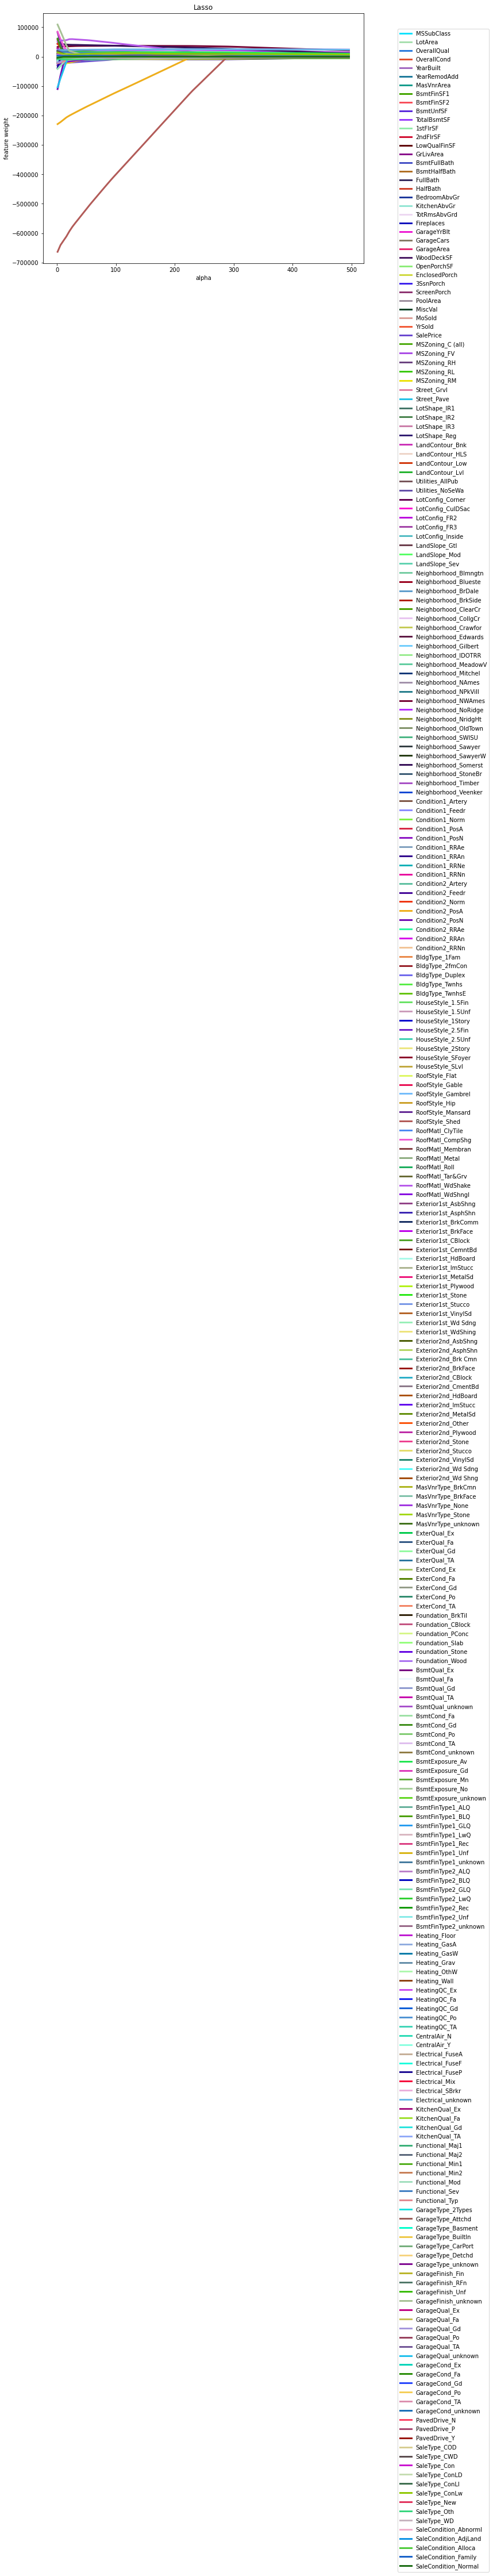

In [323]:
plt.figure(figsize=(10, 8))
for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3), linewidth=3)
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")


Text(0.5, 1.0, 'Ridge')

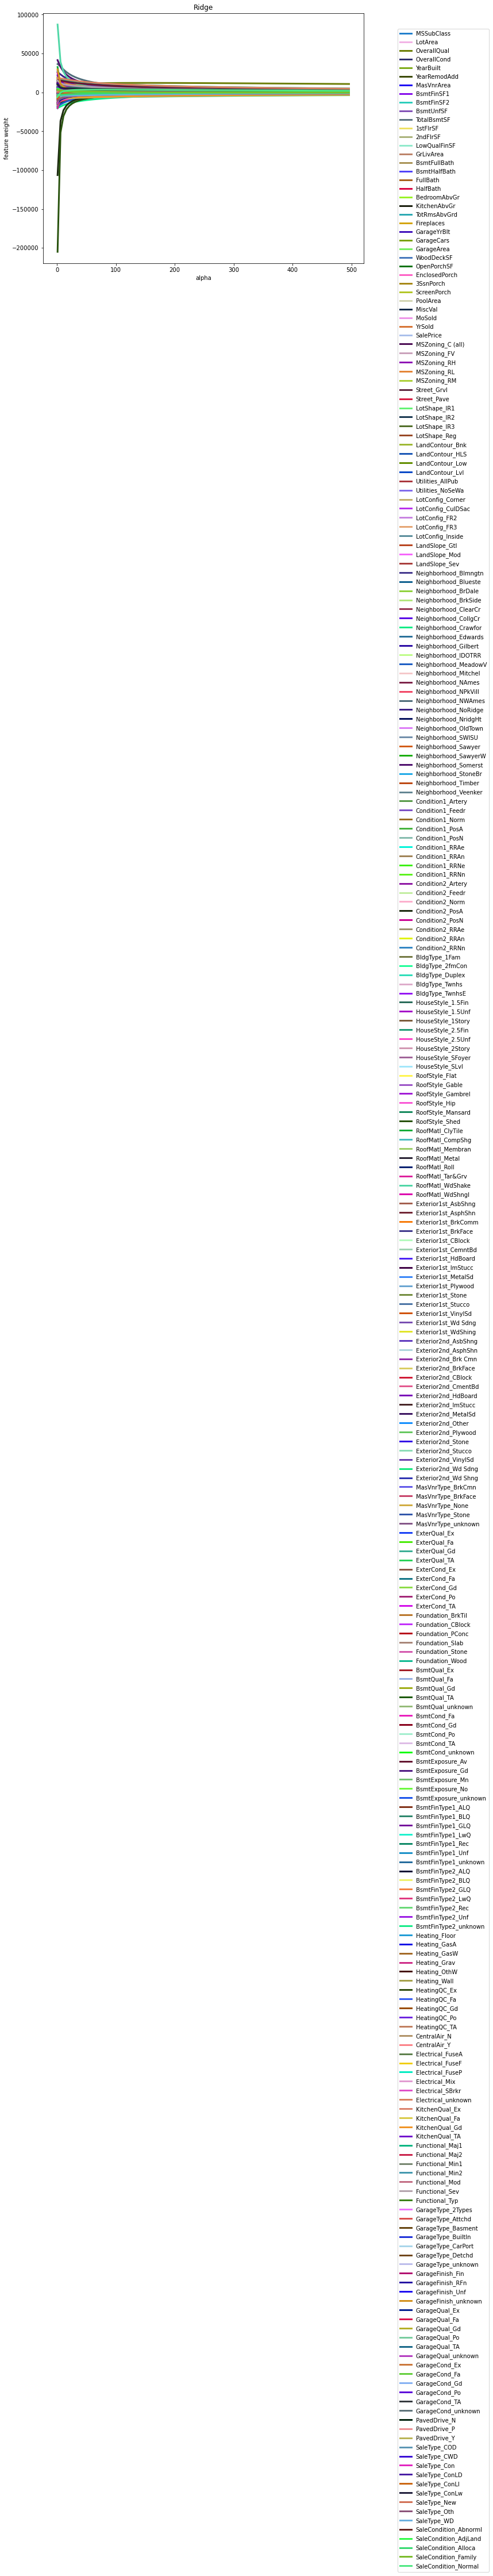

In [324]:
plt.figure(figsize=(10, 8))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3), linewidth=3)
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")


100
280


/home/rimsky/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


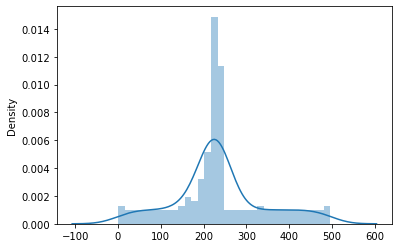

In [325]:

zeros_coefs = np.full((len(coefs_lasso)), 0)
print(len(coefs_lasso))
print(len(coefs_lasso[0]))
for i in range(len(coefs_lasso)):
    for j in range(len(coefs_lasso[0])):
        if coefs_lasso[i][j] < 0.0001:
            zeros_coefs[i] += 1
dist_df = pd.DataFrame({'alphas' : alphas, 'zero_count' : zeros_coefs})
dist_df
sns.distplot(dist_df)

## 1.7 Поиск оптимального alpha (6 баллов)

- С помощью метода LassoCV найдите оптимальное значение alpha и напечатайте его, используя разбиение на 5 фолда в кроссвалидации (`cv=5`).
- Нарисуйте график зависимости MSE от alpha (`mse_path_`).
- Нарисуйте длинную гистограмму магнитуда признаков, как в классе, на которой будет показано значение коэффициента для каждого признака. Графк должен быть остортирован по величине коэффициентов. Признаки с нулевыми коэффициентами должны быть удалены.
- Сколько в итоге ненулевых признаков осталось?
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error). Качество должно быть лучше, чем у простой линейной регрессии.

In [326]:
from sklearn.linear_model import LassoCV

lassoCV = LassoCV(cv=5, alphas=alphas, max_iter=3000).fit(X, y)
print(lassoCV.alpha_)

146


Text(0.5, 1.0, 'Зависимость MSE от alpha')

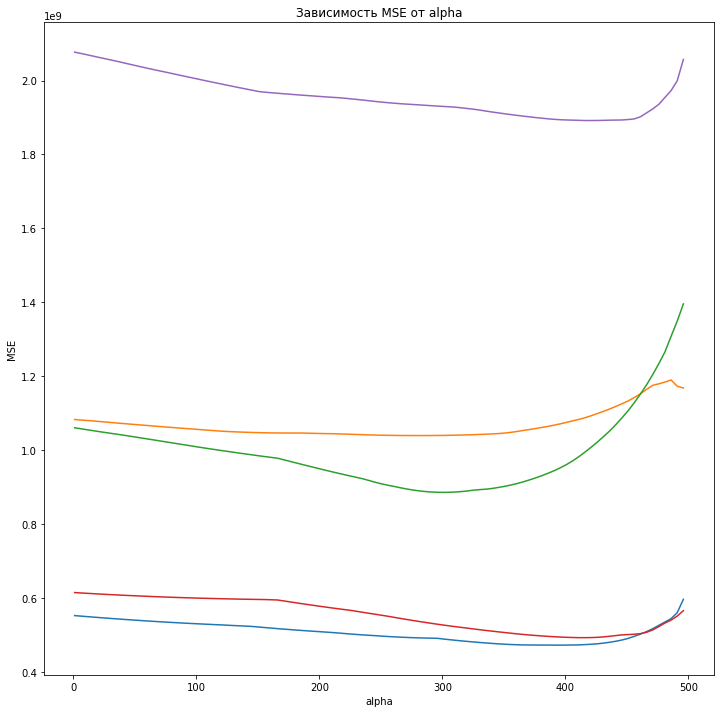

In [327]:
plt.figure(figsize=(12, 12))
plt.plot(alphas, lassoCV.mse_path_)
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.title("Зависимость MSE от alpha")

92


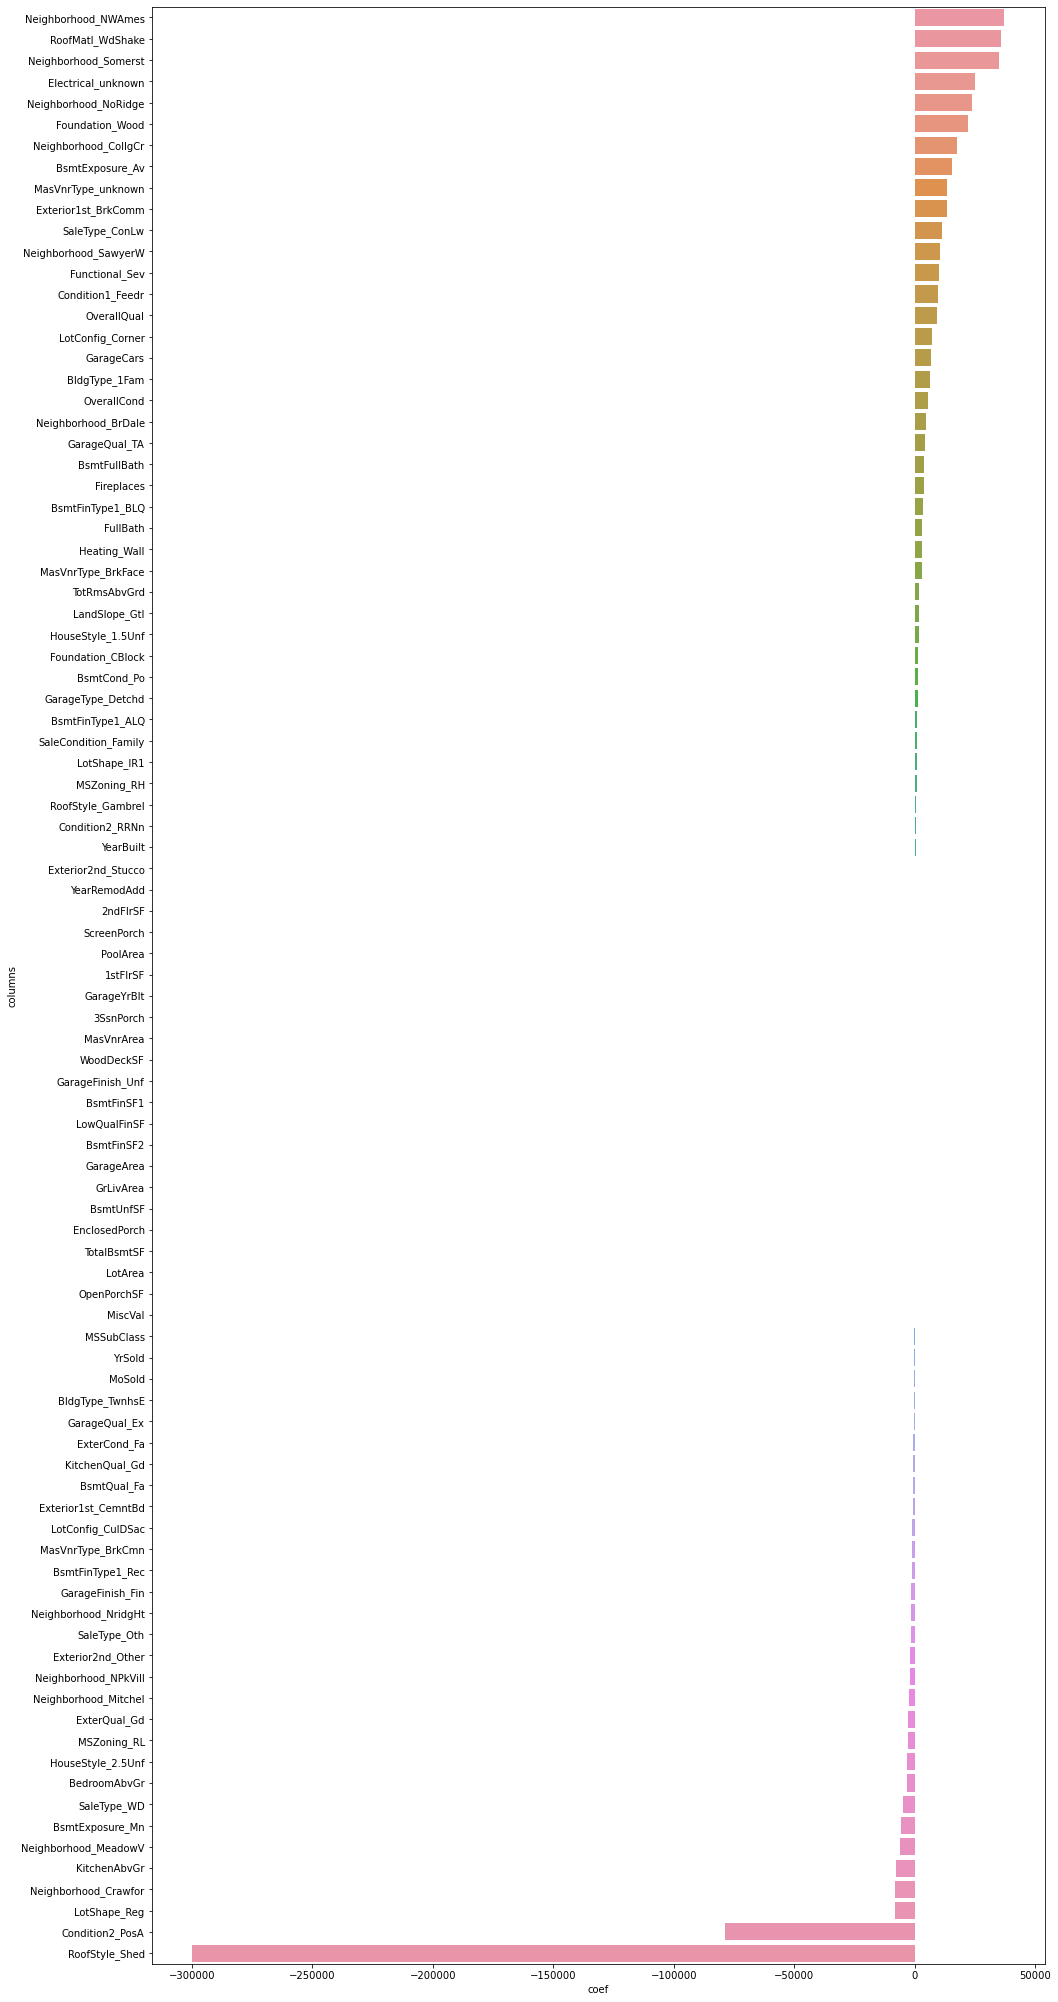

In [328]:
new_data = pd.DataFrame(list(zip(lassoCV.coef_, df.columns)))
new_data = new_data[np.abs(new_data[0]) > 0.0001]
new_data = new_data.sort_values(by=[0], ascending=False)
new_data = new_data.rename({0 : 'coef', 1:'columns'}, axis='columns')
print(len(new_data))

plt.figure(figsize=(16, 36))
sns.barplot(y='columns', x='coef', data=new_data)

In [329]:
from sklearn.linear_model import RidgeCV

ridgeCV = RidgeCV(cv=5).fit(X, y)
print(ridgeCV.alpha_)

10.0


In [330]:
print(cross_val_score(lassoCV, X, y, cv=5, scoring='neg_mean_squared_error'))
print(cross_val_score(Lasso(alpha=146, max_iter=5000), X, y, cv=5, scoring='neg_mean_squared_error'))
print(cross_val_score(ridgeCV, X, y, cv=5, scoring='neg_mean_squared_error'))

[-4.85284198e+08 -1.10482429e+09 -9.94610960e+08 -4.98345571e+08
 -1.93303598e+09]
[-4.74706802e+08 -1.04625449e+09 -9.02155301e+08 -5.06229110e+08
 -1.90999212e+09]
[-5.26422599e+08 -1.12888398e+09 -9.82483823e+08 -6.12040553e+08
 -1.93359534e+09]


## 1.8 Предсказание на отложенной выборке (3 балла)

- Используя [sklearn.model_selection.train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) разбейте датасет на 2 части - тренировочную и тестовую в соотношении 0.33. Не забудьте перемешать!
- Напечатайте размерность X_train и X_test

In [331]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)
print(X_train.shape)
print(X_test.shape)

(978, 280)
(482, 280)


Теперь, возьмите вашу самую мощную модель(не тренированную!). Запустите её тренировку по тренировочной выборке X_train, y_train с помощью функции `fit`. Постройте предсказания с помощью функции `predict`.

In [332]:
fitted_df = Lasso(alpha=146).fit(X_train, y_train)
y_predicted = fitted_df.predict(X_test)
y_predicted

array([154479.82427813, 339968.08081309, 100415.29310694, 167950.0276945 ,
       332998.66628715,  62775.92572632, 239270.10143924, 137383.01006321,
        54748.37405656, 154209.89262124, 143223.73120468, 113062.20468152,
       111620.97957513, 220731.15666676, 169267.76959362, 134364.92260248,
       197193.48090846, 130318.09548866, 122078.66964811, 216952.04530345,
       164482.61675265, 206645.40157231, 187832.98267641, 132750.03765855,
       205189.70858448, 147347.55412613, 202924.88732735, 101272.67426238,
       170468.45765237, 203753.24155593, 118415.33380984, 272984.63669716,
       245173.4401646 , 100475.0355503 , 246847.9009184 , 151387.5162459 ,
       136910.93470556, 207032.68216216, 300751.11276776, 111558.55153015,
       140274.58656313, 230734.03820128, 107140.29969963, 350548.94811283,
       128990.76155331, 139904.28468589,  98119.26483195, 135485.57273402,
       411015.67398098, 122289.97241835, 113271.1463873 , 221391.22537833,
       103948.24517302, 2

Визуализируйте scatter plot предсказанных значений и настоящих (`y_test`). У вас должен получиться график, точки которого расположены приблизительно вдоль некоторой прямой с разбросом. Идеальный предсказатель будет выглядить как набор точек вдоль прямой без разброса.

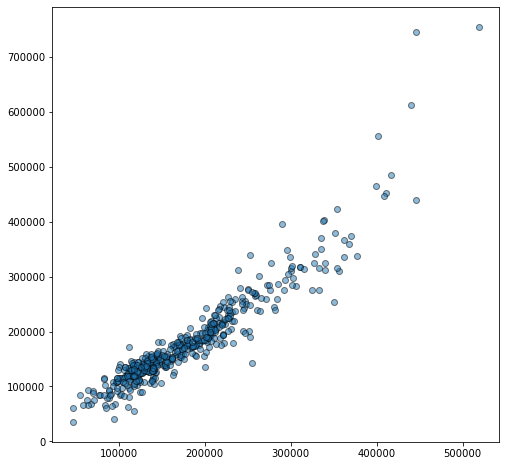

In [333]:
plt.figure(figsize=(8, 8))
plt.scatter(x=y_predicted, y=y_test, edgecolor='black', alpha=0.5)

## 1.9 Ограниченная версия ( 4 балла)

Помните в самом начале мы оставили очень мало признаков по данным из heatmap. Настало время проверить как он себя покажет! К счастью они все сразу числовые, а не категориальные. Переиспользуйте тот дадасет, где вы уже поборолись с пропусками.
Снова выделите отдельно X и y и запустите кроссвалидацию c 5 фолдами по Lasso с `alpha=1`.

In [334]:
corr_df = df[corr_y.columns]
corr_df

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
Id,,,,,,,,,,,
1,7,2003,2003,856,856,1710,2,8,2,548,208500
2,6,1976,1976,1262,1262,1262,2,6,2,460,181500
3,7,2001,2002,920,920,1786,2,6,2,608,223500
4,7,1915,1970,756,961,1717,1,7,3,642,140000
5,8,2000,2000,1145,1145,2198,2,9,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1456,6,1999,2000,953,953,1647,2,7,2,460,175000
1457,6,1978,1988,1542,2073,2073,2,7,2,500,210000
1458,7,1941,2006,1152,1188,2340,2,9,1,252,266500


In [335]:
X = corr_df.drop(columns='SalePrice')
y = corr_df['SalePrice']
print(X.shape)
print(y.shape)

(1460, 10)
(1460,)


In [336]:
lasso = Lasso(alpha=1).fit(X, y)

for coef, col in sorted(zip(lasso.coef_, X.columns), key=lambda x: np.abs(x[0])):
    print("{} \t {}".format(np.round(coef, 2), col))

14.17 	 1stFlrSF
14.97 	 GarageArea
19.87 	 TotalBsmtSF
31.63 	 TotRmsAbvGrd
51.3 	 GrLivArea
268.23 	 YearBuilt
296.48 	 YearRemodAdd
-6782.24 	 FullBath
10408.59 	 GarageCars
19603.48 	 OverallQual


In [337]:
print(cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_squared_error'))

[-9.79162472e+08 -1.38218500e+09 -1.67803085e+09 -1.13349068e+09
 -2.47655836e+09]


In [338]:
print(lasso.score(X, y))

0.7736928370250229


In [339]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)
print(X_train.shape)
print(X_test.shape)

(978, 10)
(482, 10)


In [340]:
fitted_df = Lasso(alpha=1).fit(X_train, y_train)
y_predicted = fitted_df.predict(X_test)
print(fitted_df.score(X_test, y_test))

0.7891078523027433


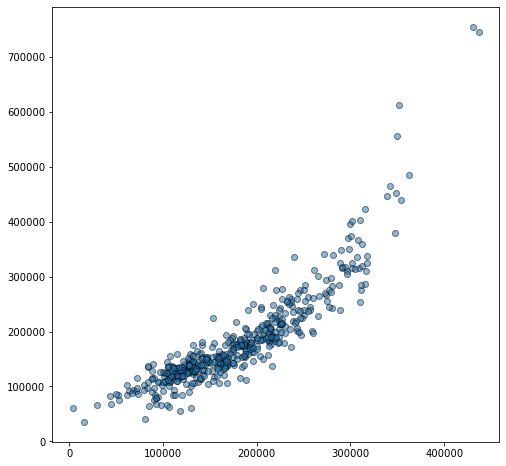

In [341]:
plt.figure(figsize=(8, 8))
plt.scatter(x=y_predicted, y=y_test, edgecolor='black', alpha=0.5)

Можете посмотреть еще много разных примеров обработки этого датасета тут: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

А суть всего этого такова, что в итоге надо кучу времени потратить на подготовку признаков. Смотреть на кучу графиков а потом стакать модели.